In [39]:
import pandas as pd
from bs4 import BeautifulSoup
import os
import requests

In [40]:
pwd = os.getcwd()
df = pd.read_csv(f'{pwd}/data/cbb.csv', parse_dates=['YEAR'])
df = df['TEAM']
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.series.Series'>
RangeIndex: 368 entries, 0 to 367
Series name: TEAM
Non-Null Count  Dtype 
--------------  ----- 
368 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


In [41]:
url = 'https://en.wikipedia.org/wiki/List_of_colloquial_names_for_universities_and_colleges_in_the_United_States'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [42]:
div_tags = soup.find_all('div', class_='mw-heading mw-heading2')

# list of all <ul> tags containing colloquial name-full name relationships
ul_tags = []
for i in range(0,25):
    ul_tags.append(div_tags[i].find_next_sibling('ul'))



In [43]:
ul_children_strings = []
ul_descendants_strings = []

for i in range(0, 25):
    for j in ul_tags[i].children:
        for string in j.stripped_strings:
            ul_children_strings.append(string)

print(ul_children_strings)



['AC', 'Augustana College (Illinois)', 'ACU', 'Abilene Christian University', 'AECOM', 'Albert Einstein College of Medicine', 'AFA', 'United States Air Force Academy', 'AFIT', 'Air Force Institute of Technology', 'AIC', 'American International College', 'Amherst', 'Amherst College', 'Annapolis', 'U.S. Naval Academy', 'A&M', 'Texas A&M University', 'Also others:see', 'A&M', 'A&M-CC or A&M-Corpus Christi', 'Texas A&M University–Corpus Christi', 'ATU', 'Arkansas Tech University', 'A&T', 'North Carolina A&T State University', 'APSU', 'Austin Peay State University', 'ALASU', 'Alabama State University', 'Army', 'U.S. Military Academy', 'ASU', 'Alabama State University', 'Albany State University', 'Alcorn State University', 'Angelo State University', 'Appalachian State University', 'Arizona State University', 'Arkansas State University', 'Augusta State University', 'APU', 'Alaska Pacific University', 'AU', 'Adelphi University', 'Alfred University', 'American University', 'Anderson University 

In [44]:
# removing '\n' element from each tag.contents list so that only the uni elements remain
for tag in ul_tags:
    unis_by_letter = tag.contents
    for element in unis_by_letter:
        if len(element) < 2:
            unis_by_letter.pop(unis_by_letter.index(element))
            

In [45]:
print(ul_tags[23].contents)

[<li>XU
<ul><li><a class="mw-redirect" href="/wiki/Xavier_University_(Cincinnati)" title="Xavier University (Cincinnati)">Xavier University (Cincinnati)</a></li></ul></li>, <li>XULA
<ul><li><a href="/wiki/Xavier_University_of_Louisiana" title="Xavier University of Louisiana">Xavier University of Louisiana</a></li></ul></li>]


In [46]:
child_desc_dict = {}

for clql_name in ul_tags:
    for uni in clql_name.contents:
        uni_split_list = uni.get_text().splitlines()
        child_desc_dict.update({uni_split_list[0]:uni_split_list[1:]})



In [47]:
url1 = 'https://mycollegeselection.com/colleges-by-state/'

headers = {
    'User-Agent': 'danariola',
    'From': 'joseph.dan.ariola@gmail.com'
}

page1 = requests.get(url1, headers=headers)

soup1 = BeautifulSoup(page1.text, 'html')


In [48]:
state_tags = soup1.find_all('h2', class_='wp-block-heading')
uni_by_state_tags = soup1.find_all('ul', class_='wp-block-list')

uni_by_state_dict = {}
for i in range(0, len(state_tags)):
    uni_list = uni_by_state_tags[i].get_text().splitlines()
    state = state_tags[i].get_text()

    for element in uni_list:
        if len(element) < 1:
            uni_list.pop(uni_list.index(element))

    uni_by_state_dict.update({state:uni_list})

print(uni_by_state_dict['Wyoming'])

['University of Wyoming']


In [49]:
cbb_schools_list = df.to_list()
cbb_schools_list_new = []

for school in cbb_schools_list:
    if 'Cal' in school and school != 'California':
        school = school.replace('Cal', 'California')
        if 'Poly' in school:
            school = school.replace('Poly', 'Polytechnic')
            cbb_schools_list_new.append(school)
            pass
        elif 'St.' in school:
            school = school.replace('St.', 'State')
            cbb_schools_list_new.append(school)
            pass
    elif 'St.' in school and school[0:3] != 'St.' and school[6:9] != 'St.':
        school = school.replace('St.', 'State')
        cbb_schools_list_new.append(school)
        pass
    else:
        cbb_schools_list_new.append(school)


print(cbb_schools_list_new[336]) 

schools_ser = pd.Series(cbb_schools_list_new)

California State Bakersfield


In [50]:
cbb_schools_list1 = []

for school in cbb_schools_list:
    if school in child_desc_dict.keys():
        if school == 'LSU':
            school = child_desc_dict[school][1]
            cbb_schools_list1.append(school)
        else:
            school = child_desc_dict[school][0]
            cbb_schools_list1.append(school)
    else:
        cbb_schools_list1.append(school)

print(len(cbb_schools_list1))

print(cbb_schools_list1)


368
['North Carolina', 'Wisconsin', 'Michigan', 'Texas Tech', 'Gonzaga', 'Kentucky', 'Duke University', 'Virginia', 'Villanova', 'Connecticut', 'Louisville', 'Notre Dame', 'Florida St.', 'Purdue', 'Kansas', 'Kansas St.', 'Xavier', 'Arizona', 'Oregon', 'Florida', 'Michigan St.', 'Dayton', 'Ohio St.', 'Marquette', 'Syracuse', 'Oklahoma', 'Loyola Chicago', 'South Carolina', 'Auburn', 'Wichita St.', 'Duquesne', 'Fordham', 'George Mason', 'George Washington', 'La Salle', 'Massachusetts', 'Rhode Island', 'Richmond', "Saint Joseph's", 'Saint Louis', 'St. Bonaventure', 'Davidson', 'Virginia Commonwealth University', 'Boston College', 'Clemson', 'Georgia Institute of Technology', 'Miami FL', 'Pittsburgh', 'Virginia Polytechnic Institute and State University', 'Wake Forest', 'North Carolina St.', 'Binghamton', 'Hartford', 'Maine', 'New Hampshire', 'Stony Brook', 'UMass Lowell', 'University of Maryland, Baltimore County', 'Vermont', 'Albany', 'East Carolina', 'Houston', 'University of Memphis', '

In [51]:
# catching cbb_schools_list1 edge cases

case1 = {
    'Arkansas': 'University of Arkansas',
    'Kansas': 'University of Kansas',
    'Connecticut': 'University of Connecticut',
    'Indiana': 'Indiana University',
    'Ohio': 'Ohio University',
    'West Virginia': 'West Virginia University',
    'California': 'University of California, Berkeley',
    'North Carolina': 'University of North Carolina at Chapel Hill'
}

case2 = {
    'Kansas St.': 'Kansas State University',
    'American': 'American University',
    'Penn': 'University of Pennsylvania'
}


for school in cbb_schools_list1:
    if school in uni_by_state_dict.keys(): 
        if school in case1.keys(): # Case 1
            school_index = cbb_schools_list1.index(school)
            cbb_schools_list1.pop(school_index)
            cbb_schools_list1.insert(school_index, case1[school])
        else:
            school_index = cbb_schools_list1.index(school)
            cbb_schools_list1.pop(school_index)
            cbb_schools_list1.insert(school_index, f"University of {school}")
    elif school in case2.keys(): # Case 2
        school_index = cbb_schools_list1.index(school)
        cbb_schools_list1.pop(school_index)
        cbb_schools_list1.insert(school_index, case2[school])
    else:
        pass

print(cbb_schools_list1)
uni_mapping_series = pd.Series(cbb_schools_list1)
uni_mapping_series.to_csv('uni_mapping_test.csv')

['University of North Carolina at Chapel Hill', 'University of Wisconsin', 'University of Michigan', 'Texas Tech', 'Gonzaga', 'University of Kentucky', 'Duke University', 'University of Virginia', 'Villanova', 'University of Connecticut', 'Louisville', 'Notre Dame', 'Florida St.', 'Purdue', 'University of Kansas', 'Kansas State University', 'Xavier', 'University of Arizona', 'University of Oregon', 'University of Florida', 'Michigan St.', 'Dayton', 'Ohio St.', 'Marquette', 'Syracuse', 'University of Oklahoma', 'Loyola Chicago', 'University of South Carolina', 'Auburn', 'Wichita St.', 'Duquesne', 'Fordham', 'George Mason', 'George Washington', 'La Salle', 'University of Massachusetts', 'University of Rhode Island', 'Richmond', "Saint Joseph's", 'Saint Louis', 'St. Bonaventure', 'Davidson', 'Virginia Commonwealth University', 'Boston College', 'Clemson', 'Georgia Institute of Technology', 'Miami FL', 'Pittsburgh', 'Virginia Polytechnic Institute and State University', 'Wake Forest', 'Nor

In [52]:
# cbb.csv --> df --> cbb_schools_list --> cbb_schools_list1 (changed colloquial to full uni names) --> school_adj --> cbb_df 
cbb_schools_dict = {
    'school_old': cbb_schools_list,
    'school_adj': cbb_schools_list1
    }

cbb_df = pd.DataFrame(cbb_schools_dict)
cbb_df

,school_old,school_adj
0,North Carolina,University of North Carolina at Chapel Hill
1,Wisconsin,University of Wisconsin
2,Michigan,University of Michigan
3,Texas Tech,Texas Tech
4,Gonzaga,Gonzaga
...,...,...
363,Lindenwood,Lindenwood
364,Texas A&M Commerce,Texas A&M Commerce
365,Stonehill,Stonehill
366,Southern Indiana,Southern Indiana


In [53]:
all_uni_list = []
state_by_uni_list = []

for state, uni_list in uni_by_state_dict.items():
    for school in uni_list:
        all_uni_list.append(school)
        state_by_uni_list.append(state)

school_and_state_dict = {
    'school': all_uni_list,
    'state': state_by_uni_list
}

school_and_state_df = pd.DataFrame(school_and_state_dict)
school_and_state_df

,school,state
0,Alabama A&M University,Alabama
1,Alabama State University,Alabama
2,Amridge University,Alabama
3,Auburn University,Alabama
4,Auburn University at Montgomery,Alabama
...,...,...
1396,University of Wisconsin – Superior,Wisconsin
1397,University of Wisconsin – Whitewater,Wisconsin
1398,Viterbo University,Wisconsin
1399,Wisconsin Lutheran College,Wisconsin


In [54]:
from thefuzz import process
from thefuzz import fuzz

cbb_df['school_adj'] = cbb_df['school_adj'].apply(lambda x: process.extractOne(x, school_and_state_df['school'], scorer=fuzz.partial_ratio)[0])

In [55]:
# joining cbb.df and school_and_state_df
merged_df = pd.merge(cbb_df, school_and_state_df, how='left', left_on='school_adj', right_on='school')
merged_df

,school_old,school_adj,school,state
0,North Carolina,University of North Carolina at Chapel Hill,University of North Carolina at Chapel Hill,North Carolina
1,Wisconsin,University of Wisconsin – Eau Claire,University of Wisconsin – Eau Claire,Wisconsin
2,Michigan,University of Michigan,University of Michigan,Michigan
3,Texas Tech,Texas Tech University,Texas Tech University,Texas
4,Gonzaga,Gonzaga University,Gonzaga University,Washington
...,...,...,...,...
366,Lindenwood,Lindenwood University,Lindenwood University,Missouri
367,Texas A&M Commerce,Texas A&M University – Commerce,Texas A&M University – Commerce,Texas
368,Stonehill,Stonehill College,Stonehill College,Massachusetts
369,Southern Indiana,University of Southern Indiana,University of Southern Indiana,Indiana


In [56]:
# Addressing 'Kansas St.' edge case being transformed into 'Arkansas State University'
merged_df.info()

merged_df.loc[merged_df['school_old'] == 'Kansas St.', 'school_adj'] = 'Kansas State University'
merged_df.loc[merged_df['school_old'] == 'Kansas St.', 'school'] = 'Kansas State University'
merged_df.loc[merged_df['school_old'] == 'Kansas St.', 'state'] = 'Kansas'
merged_df.loc[merged_df['school_old'] == 'Kansas St.', 'state_abbr'] = 'KS'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_old  371 non-null    object
 1   school_adj  371 non-null    object
 2   school      371 non-null    object
 3   state       371 non-null    object
dtypes: object(4)
memory usage: 11.7+ KB


In [57]:
state_abbr_dict = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'American Samoa': 'AS',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Trust Territories': 'TT',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Virgin Islands': 'VI',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

merged_df['state_abbr'] = ['DC' if state == 'Washington D.C.' else f'{state_abbr_dict[state]}' for state in merged_df['state']]
merged_df['state_abbr']

0      NC
1      WI
2      MI
3      TX
4      WA
       ..
366    MO
367    TX
368    MA
369    IN
370    NY
Name: state_abbr, Length: 371, dtype: object

In [58]:
main_df = pd.read_csv(f'{pwd}/data/cbb.csv', parse_dates=['YEAR'])
main_merged_df = pd.merge(main_df, merged_df, how='left', left_on='TEAM', right_on='school_old')

main_merged_df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,ADJ_T,WAB,POSTSEASON,SEED,YEAR,school_old,school_adj,school,state,state_abbr
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,71.7,8.6,2ND,1.0,2016-01-01,North Carolina,University of North Carolina at Chapel Hill,University of North Carolina at Chapel Hill,North Carolina,NC
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,59.3,11.3,2ND,1.0,2015-01-01,Wisconsin,University of Wisconsin – Eau Claire,University of Wisconsin – Eau Claire,Wisconsin,WI
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,65.9,6.9,2ND,3.0,2018-01-01,Michigan,University of Michigan,University of Michigan,Michigan,MI
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,67.5,7.0,2ND,3.0,2019-01-01,Texas Tech,Texas Tech University,Texas Tech University,Texas,TX
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,71.5,7.7,2ND,1.0,2017-01-01,Gonzaga,Gonzaga University,Gonzaga University,Washington,WA


In [59]:
# mapping POSTSEASON values to ordinal values

postseason_mapping_dict = {
    'Champions': 1,
    '2ND': 2,
    'F4': 3,
    'E8': 4,
    'S16': 5,
    'R32': 6,
    'R64': 7,
    'R68': 8
}

main_merged_df['POSTSEASONordinal'] = [postseason_mapping_dict[round] if round in postseason_mapping_dict.keys() else round for round in main_merged_df['POSTSEASON']]

In [60]:
merged_df.to_csv('uni_state.csv')
main_merged_df.to_csv('cbb_merged.csv')

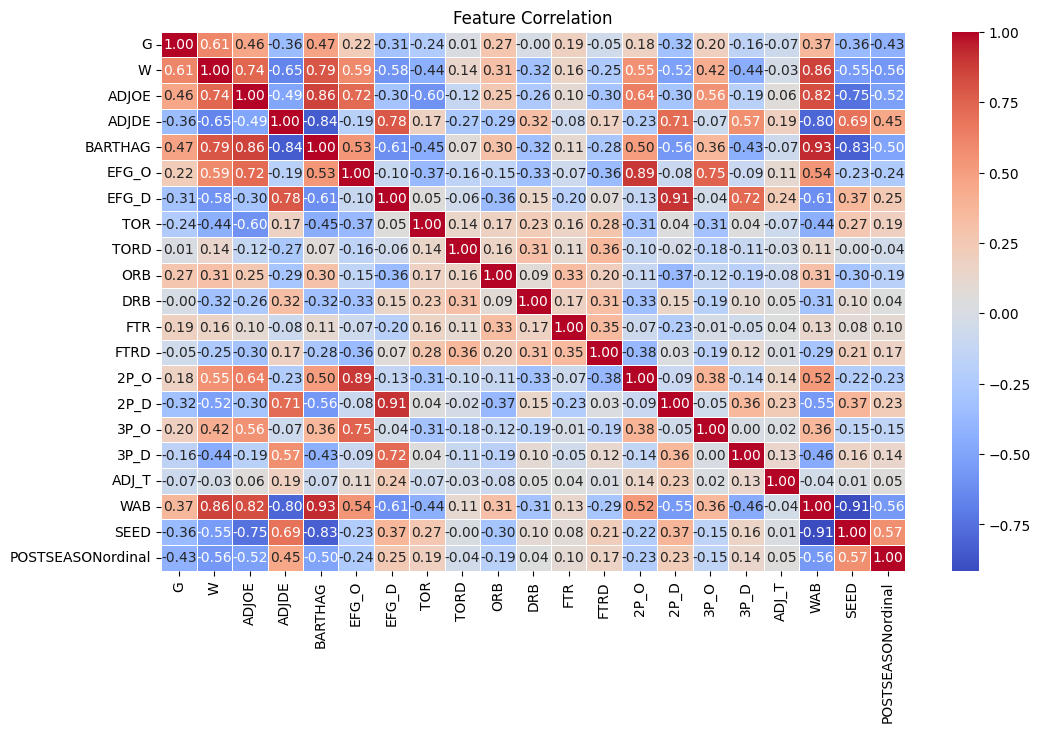

In [61]:
import matplotlib.pyplot as plt 
import seaborn as sns

corr_matr = main_merged_df[['G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T', 'WAB', 'SEED', 'POSTSEASONordinal']].corr()

plt.figure(figsize=(12,7))
sns.heatmap(corr_matr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation")
plt.show()